In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load some data in a pandas dataframe

df = None

# this data set represents the system during deployment at non-stationary conditions
df =pd.read_excel("C:/Users/Admin/Pythonprojects/RAMS/data/Arduino_trainingset_deploymentNormalopenLabel.xlsx", index_col=0)

#df = pd.read_csv("https://raw.githubusercontent.com/chrisrijsdijk/RAMS/master/data/Oilanalysis.csv", sep=";")

In [3]:
# check the datatypes in the dataframe to verify that all columns except for "Age" are numerical

df.dtypes

S1             int64
VoltageA0    float64
VoltageA1    float64
VoltageA2    float64
F1             int64
F2             int64
F3             int64
F4             int64
F5             int64
F6             int64
dtype: object

In [4]:
# get a preview on the data

#df.head(3)
df.describe()


,S1,VoltageA0,VoltageA1,VoltageA2,F1,F2,F3,F4,F5,F6
count,1743.000000,1743.000000,1743.000000,1743.000000,1743.0,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000
mean,0.340218,1.064938,0.523923,0.120597,0.0,0.027539,0.065404,0.029260,0.065404,0.083764
std,0.473918,1.774011,1.081554,0.695237,0.0,0.163694,0.247309,0.168583,0.247309,0.277113
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,3.378906,0.317383,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,4.995117,4.619141,4.628906,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# make a dictionary that maps the dummies to plain English

failure_dict = {}

failure_dict["F1"] = {0: "F, ", 1:"T, "}
failure_dict["F2"] = {0: " F, ", 1:" T, "}
failure_dict["F3"] = {0: " F, ", 1:" T, "}
failure_dict["F4"] = {0: " F, ", 1:" T, "}
failure_dict["F5"] = {0: " F, ", 1:" T, "}
failure_dict["F6"] = {0: " F, ", 1:" T, "}

In [6]:
# define the response variable and convert it into an np.array
    
y_F1 = np.array(df["F1"])
y_F2 = np.array(df["F2"])
y_F3 = np.array(df["F3"])
y_F4 = np.array(df["F4"])
y_F5 = np.array(df["F5"])
y_F6 = np.array(df["F6"])

In [7]:
#perform RF

from sklearn.impute import KNNImputer
#from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
#from sklearn.tree import DecisionTreeClassifie

from sklearn.inspection import permutation_importance

In [8]:
# define the explanatory variables

X=df.iloc[:,[1,2,3,0]]
X_names=df.iloc[:,[1,2,3,0]].columns

In [9]:
X_names


Index(['VoltageA0', 'VoltageA1', 'VoltageA2', 'S1'], dtype='object')

In [10]:
#impute data in case of NaN's by using K nearest neighbour

imputer = KNNImputer(n_neighbors=5, weights="distance")
X=imputer.fit_transform(X)


In [11]:
# Define and fit the model

rf_F1 = RandomForestClassifier(n_estimators = 40, criterion="gini",random_state = None)
rf_F2 = RandomForestClassifier(n_estimators = 40, criterion="gini",random_state = None)
rf_F3 = RandomForestClassifier(n_estimators = 40, criterion="gini",random_state = None)
rf_F4 = RandomForestClassifier(n_estimators = 40, criterion="gini",random_state = None)
rf_F5 = RandomForestClassifier(n_estimators = 40, criterion="gini",random_state = None)
rf_F6 = RandomForestClassifier(n_estimators = 40, criterion="gini",random_state = None)

rf_F1.fit(X, y_F1)
rf_F2.fit(X, y_F2)
rf_F3.fit(X, y_F3)
rf_F4.fit(X, y_F4)
rf_F5.fit(X, y_F5)
rf_F6.fit(X, y_F6)

RandomForestClassifier(n_estimators=40)

In [12]:
#plot the importance of the various explanatory variables using Gini importance

featureImportances = np.array([rf_F1.feature_importances_, 
                               rf_F2.feature_importances_, 
                               rf_F3.feature_importances_, 
                               rf_F4.feature_importances_, 
                               rf_F5.feature_importances_, 
                               rf_F6.feature_importances_
])


pd.DataFrame(featureImportances, columns = X_names, index = ["F1","F2","F3","F4","F5","F6"])


,VoltageA0,VoltageA1,VoltageA2,S1
F1,0.000000,0.000000,0.000000,0.000000
F2,0.436821,0.468864,0.050376,0.043939
F3,0.319048,0.047253,0.001855,0.631844
F4,0.192556,0.657524,0.142472,0.007449
F5,0.369986,0.102287,0.000576,0.527151
F6,0.010622,0.129121,0.850855,0.009403


In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

In [14]:
# define the explanatory variables

X=df.iloc[:,[1,2,3,0]]
X_names=df.iloc[:,[1,2,3,0]].columns


In [15]:
#impute data in case of NaN's by using K nearest neighbour

imputer = KNNImputer(n_neighbors=5, weights="distance")
X=imputer.fit_transform(X)

In [16]:
#transpose the dataframe while disposing the first non-numerical column

scaler=StandardScaler()

X = scaler.fit_transform(X)
#print(scaler.mean_)

In [17]:
#prepare an elbow plot to visually determine a feasible number of clusters

inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    inertia.append(kmeanModel.inertia_)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


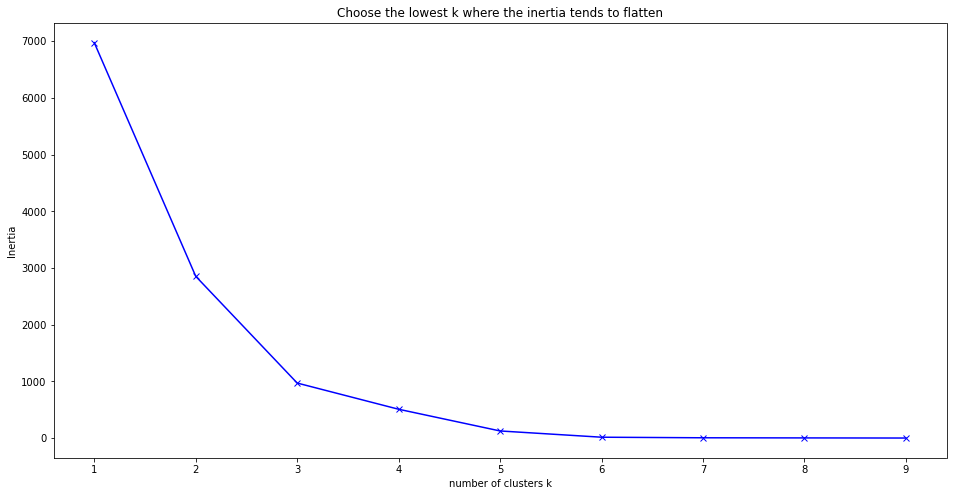

In [18]:
#create the elbow plot

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('number of clusters k')
plt.ylabel('Inertia')
plt.title('Choose the lowest k where the inertia tends to flatten')
plt.show()

In [19]:
# perform the k-means clustering while filling the preferred number of clusters in the first line

#the number of clusters k is:
k=6

kmeanModel = KMeans(n_clusters=k)
kmeanModel.fit(X)
#kmeanModel.predict(X)

KMeans(n_clusters=6)

In [20]:
# add the clusterlabels to the dataframe of samples

df["clusterlabels"]=kmeanModel.labels_
#df=df.sort_values("clusterlabels")
#df.describe()
dfclustermeans=df.groupby("clusterlabels").mean()
dfclustermeans

,S1,VoltageA0,VoltageA1,VoltageA2,F1,F2,F3,F4,F5,F6
clusterlabels,,,,,,,,,,
0,0.0,0.000000,0.007227,0.005898,0.0,0.0,0.0,0.0,0.0,0.085217
1,1.0,3.379230,1.449886,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
2,1.0,4.995117,4.253235,4.237874,0.0,0.0,0.0,0.0,0.0,1.000000
3,1.0,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,1.0,0.000000
4,1.0,4.995117,4.301375,0.000000,0.0,0.0,0.0,1.0,0.0,0.000000
5,1.0,4.995117,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000


In [21]:
# load the designer labels

In [22]:
#load some data in a pandas dataframe

df_dl = None

# this data set represents the system during deployment at stationary conditions
df_dl =pd.read_excel("C:/Users/Admin/Pythonprojects/RAMS/data/Arduino_trainingset_deploymentNormalopenLabelDesign.xlsx", index_col=0)

#df_dl = pd.read_csv("https://raw.githubusercontent.com/chrisrijsdijk/RAMS/master/data/???.csv", sep=";")

In [23]:
# check the datatypes in the dataframe to verify that all columns except for "Age" are numerical

df_dl.dtypes

systemState     object
VoltageA0      float64
VoltageA1      float64
VoltageA2        int64
F1              object
F2              object
F3              object
F4              object
F5              object
F6              object
dtype: object

In [24]:
df_dl = df_dl.astype('float64', errors="ignore")

In [25]:
# convert categorical variables into indicator functions

df_dl = pd.get_dummies(df_dl, columns=["systemState"], prefix="systemState", prefix_sep="_", drop_first=True, dtype=None)
df_dl = df_dl.iloc[:,[3,4,5,6,7,8,0,1,2,9]]
df_dl

,F1,F2,F3,F4,F5,F6,VoltageA0,VoltageA1,VoltageA2,systemState_power_on
0,?,?,?,?,?,?,0.0,0.0,0.0,0
1,F,F,F,F,F,F,3.4,1.4,0.0,1
2,F,T,F,?,?,?,5.0,0.0,0.0,1


In [26]:
#dispose non numerical columns from the dataframe

X_dl = df_dl.select_dtypes(include='number')
X_dl

,VoltageA0,VoltageA1,VoltageA2,systemState_power_on
0,0.0,0.0,0.0,0
1,3.4,1.4,0.0,1
2,5.0,0.0,0.0,1


In [27]:
# apply the RF classifier to the Arduino controller

In [32]:
import serial
import time
import keyboard

In [33]:
# connect with Arduino

ser = serial.Serial('COM3', 9600, timeout=1)
time.sleep(2)

In [34]:
# read write the serial connection at a given sampling rate

def write_read(x):
    ser.write(bytes(x, 'utf-8'))
    time.sleep(0.05)
    data = ser.readline()
    return data

In [ ]:
# start to control the Arduino while collecting the data

i= True
num = '0'
dict_S1 = {"power_off":0,"power_on":1}

print("Press <1> to switch power on")
print("Press <0> to switch power off")
print("Press <q> to quit")
print(".............................")
print("[F1,  F2,  F3,  F4,  F5,  F6,  V_0, V_1, V_2,S1]")

while i:  # making a loop
    
    if keyboard.is_pressed('q'):  # if key 'q' is pressed 
        print('')
        print('You Pressed <q>uit!')
        i = False                 # finishing the loop
        
    elif keyboard.is_pressed('0'): # if key '0' is pressed
        num = '0'
        
    elif keyboard.is_pressed('1'): # if key '1' is pressed
        num = '1'
        
    else:
        value = write_read(num)                          # if user pressed a key other than the given key the loop will break

        dummy = value.decode().rstrip().split()
        dum4 = np.array([[int(j)/1023*5 for j in dummy[1:]]])   # dump voltage readings in a np.array
        dum5 = np.array([np.append(dum4, dict_S1[dummy[0]])])   # append a numerical switch/power value to the np.array
        
        dum_F1 = rf_F1.predict(dum5)    
        dum_F2 = rf_F2.predict(dum5)    
        dum_F3 = rf_F3.predict(dum5)    
        dum_F4 = rf_F4.predict(dum5)    
        dum_F5 = rf_F5.predict(dum5) 
        dum_F6 = rf_F6.predict(dum5)
        
        dum6 = scaler.transform(dum5)                   # dum4 is a transformation of the data applied during fitting
        dum1 = kmeanModel.predict(dum6)                 # dum1 is the label of the nearest clustermean
        dum2 = kmeanModel.cluster_centers_[dum1]        # dum2 is an array of coordinates of the nearest clustermean
        dum3 = scaler.inverse_transform(dum2)           # reschale 

        if ( (min(   list( np.linalg.norm(np.array(dum5) - np.array(X_dl.iloc[i,:])) for i in range(len(X_dl.index)) )  )>0.7) & (np.linalg.norm(dum5-dum3)>0.7) ):
            print("[--,  --,  --,  --,  --,  --,  ---, ---, ---,--]: ",
                  "Anomalous design label; distance to nearest label: ",round(min(   list( np.linalg.norm(np.array(dum5) - np.array(X_dl.iloc[i,:])) for i in range(len(X_dl.index)) )  ),2),
                  ".                                                                                                                      ",-
                  "[--,  --,  --,  --,  --,  --,  ---, ---, ---,--]: ",
                  "Anomalous random forest label; distance to nearest label: ", round(np.linalg.norm(dum5-dum3),2),
                  ".                                                                                                                     ",               
                  str(pd.to_datetime(round(time.time(), 0),unit = 's')),
                  "  ", [dummy[i] for i in [1,2,3,0]], "  ",list(dum5[0]),
                  ".                                                                                                                     ",               
                  end = "\r") 
            
        elif (min(   list( np.linalg.norm(np.array(dum5) - np.array(X_dl.iloc[i,:])) for i in range(len(X_dl.index)) )  )<=0.7) & (np.linalg.norm(dum5-dum3)>0.7):
            print(list(df_dl.iloc[np.argmin(   list( np.linalg.norm(np.array(dum5) - np.array(X_dl.iloc[i,:])) for i in range(len(X_dl.index)) )  ),:]),
                  ": Design label                                                                                                         ",
                  ".                                                                                                                      ",
                  "[--,  --,  --,  --,  --,  --,  ---, ---, ---,--]: ",
                  "Anomalous random forest label; distance to nearest label: ", round(np.linalg.norm(dum5-dum3),2),
                  ".                                                                                                                     ",               
                  str(pd.to_datetime(round(time.time(), 0),unit = 's')),
                  "  ", [dummy[i] for i in [1,2,3,0]], "  ",list(dum5[0]),
                  ".                                                                                                                     ",               
                  end = "\r") 
            
        elif (min(   list( np.linalg.norm(np.array(dum5) - np.array(X_dl.iloc[i,:])) for i in range(len(X_dl.index)) )  )>0.7) & (np.linalg.norm(dum5-dum3)<=0.7):
            print("[--,  --,  --,  --,  --,  --,  ---, ---, ---,--]: ",
                  "Anomalous design label; distance to nearest label: ",round(min(   list( np.linalg.norm(np.array(dum5) - np.array(X_dl.iloc[i,:])) for i in range(len(X_dl.index)) )  ),2),
                  ".                                                                                                                      ",
                  "[",                  
                  failure_dict["F1"][dum_F1[0]], 
                  failure_dict["F2"][dum_F2[0]], 
                  failure_dict["F3"][dum_F3[0]], 
                  failure_dict["F4"][dum_F4[0]], 
                  failure_dict["F5"][dum_F5[0]], 
                  failure_dict["F6"][dum_F6[0]], 
                  round(dum5[0][0],1),",",
                  round(dum5[0][1],1),",",
                  round(dum5[0][2],1),",",
                  int(dum5[0][3]),
                  " ]: Random forest label                                                                                                ",
                  str(pd.to_datetime(round(time.time(), 0),unit = 's')),
                  "  ", [dummy[i] for i in [1,2,3,0]], "  ",list(dum5[0]),
                  ".                                                                                                                     ",               
                  end = "\r")            
                
        else:
            print(list(df_dl.iloc[np.argmin(   list( np.linalg.norm(np.array(dum5) - np.array(X_dl.iloc[i,:])) for i in range(len(X_dl.index)) )  ),:]),
                  ": Design label                                                                                                         ",
                  "[",
                  failure_dict["F1"][dum_F1[0]], 
                  failure_dict["F2"][dum_F2[0]], 
                  failure_dict["F3"][dum_F3[0]], 
                  failure_dict["F4"][dum_F4[0]], 
                  failure_dict["F5"][dum_F5[0]], 
                  failure_dict["F6"][dum_F6[0]], 
                  round(dum5[0][0],1),"",
                  round(dum5[0][1],1),"",
                  round(dum5[0][2],1),"",
                  int(dum5[0][3]),
                  "]: Randomq forest label                                                                                                ",
                  str(pd.to_datetime(round(time.time(), 0),unit = 's')),
                  "  ", [dummy[i] for i in [1,2,3,0]], "  ",list(dum5[0]),
                  ".                                                                                                                     ",               
                  end = "\r")     
        
ser.close()

Press <1> to switch power on
Press <0> to switch power off
Press <q> to quit
.............................
[F1,  F2,  F3,  F4,  F5,  F6,  V_0, V_1, V_2,S1]


# 